# Football/Soccer Database

Personal project focused on querying results and using techniques in SQL to improve performance.

Dataset for this analysis is the [European Soccer Database](https://www.kaggle.com/hugomathien/soccer)

### Dataset:
+25,000 matches
+10,000 players
11 European Countries with their lead championship
Seasons 2008 to 2016
Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
Team line up with squad formation (X, Y coordinates)
Betting odds from up to 10 providers
Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches
*16th Oct 2016: New table containing teams' attributes from FIFA !


### SQL Techniques include:
  - CASE Statements
  - CTEs
  - Window Functions

In [9]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [10]:
# load database
db = "database.sqlite"

Create a run_query() function, that takes a SQL query as an argument and returns a pandas dataframe of that query.

In [16]:
def run_query(q):
    with sqlite3.connect(db) as conn:
        return pd.read_sql(q, conn)

Create a run_command() function that takes a SQL command as an argument and executes it using the sqlite module.

In [17]:
def run_command(c):
    with sqlite3.connect(db) as conn:
        conn.isolation_level = None
        conn.execute(c)

Create a show_tables() function that calls the run_query() function to return a list of all tables and views in the database.

In [18]:
def show_tables():
    q = '''
    SELECT
        name,
        type
    FROM sqlite_master
    WHERE type IN ("table","view");
    '''
    return run_query(q)

show_tables()

,name,type
0,sqlite_sequence,table
1,Player_Attributes,table
2,Player,table
3,Match,table
4,League,table
5,Country,table
6,Team,table
7,Team_Attributes,table


--------------------------------------------------------------------------

### number of matches played in each country during the 2012/2013, 2013/2014, and 2014/2015 match seasons

In [27]:
q = """
SELECT
    c.name as country,
    COUNT(CASE WHEN m.season = '2012/2013' THEN m.id
                    END) AS matches_2012_2013,
    COUNT(CASE WHEN m.season = '2013/2014' THEN m.id
                    END) AS matches_2013_2014,
    COUNT(CASE WHEN m.season = '2014/2015' THEN m.id
                    END) AS matches_2014_2015
FROM country as c
LEFT JOIN match as m
    ON c.id = m.country_id
GROUP BY country;
"""

run_query(q)

,country,matches_2012_2013,matches_2013_2014,matches_2014_2015
0,Belgium,240,12,240
1,England,380,380,380
2,France,380,380,380
3,Germany,306,306,306
4,Italy,380,380,379
5,Netherlands,306,306,306
6,Poland,240,240,240
7,Portugal,240,240,306
8,Scotland,228,228,228
9,Spain,380,380,380


Text(0.5, 1.0, 'Total Games from 2012 - 2015 Season per Country')

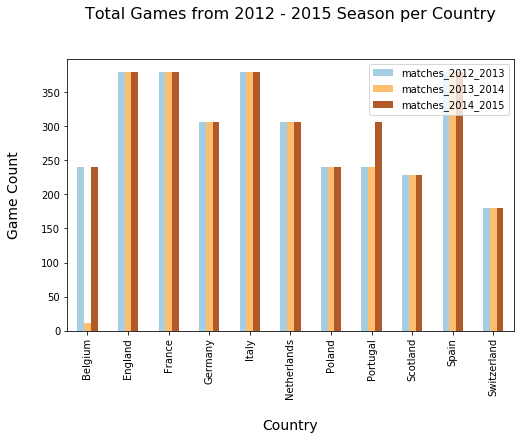

In [46]:
matches_count = run_query(q)
matches_count.set_index("country", inplace=True, drop=True)

matches_count.plot.bar(
    colormap=plt.cm.Paired, figsize=(8,5))
plt.ylabel("Game Count", fontsize = 14, labelpad = 20)
plt.xlabel("Country", fontsize = 14, labelpad = 20)
plt.title("Total Games from 2012 - 2015 Season per Country", fontsize = 16, pad = 40)

----------------------------------------------------------

### total number of matches won by the home team in each country during the 2012/2013, 2013/2014, and 2014/2015 seasons

In [49]:
q = """
SELECT 
	c.name AS country,
	SUM(CASE WHEN m.season = '2012/2013' AND m.home_team_goal > m.away_team_goal 
        THEN 1 ELSE 0 END) AS matches_2012_2013,
 	SUM(CASE WHEN m.season = '2013/2014' AND m.home_team_goal > m.away_team_goal 
        THEN 1 ELSE 0 END) AS matches_2013_2014,
	SUM(CASE WHEN m.season = '2014/2015' AND m.home_team_goal > m.away_team_goal 
        THEN 1 ELSE 0 END) AS matches_2014_2015
FROM country AS c
LEFT JOIN match AS m
ON c.id = m.country_id
GROUP BY country;"""

run_query(q)

,country,matches_2012_2013,matches_2013_2014,matches_2014_2015
0,Belgium,102,6,106
1,England,166,179,172
2,France,170,168,181
3,Germany,130,145,145
4,Italy,177,181,152
5,Netherlands,137,144,138
6,Poland,97,110,114
7,Portugal,103,108,137
8,Scotland,89,102,102
9,Spain,189,179,171


Text(0.5, 1.0, 'Home Team Victories per Country (2012-2015)')

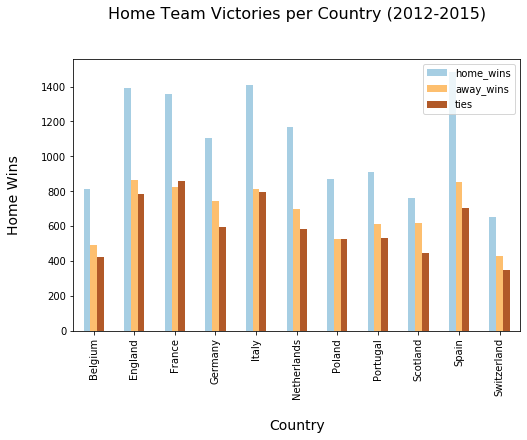

In [57]:
home_count = run_query(q)
home_count.set_index("country", inplace=True, drop=True)

home_count.plot.bar(
    colormap=plt.cm.Paired, figsize=(8,5))
plt.ylabel("Home Wins", fontsize = 14, labelpad = 20)
plt.xlabel("Country", fontsize = 14, labelpad = 20)
plt.title("Home Team Victories per Country (2012-2015)", fontsize = 16, pad = 40)

In [56]:
q = """
SELECT 
    c.name AS country,
	COUNT(CASE WHEN m.home_team_goal > m.away_team_goal THEN m.id 
        END) AS home_wins,
	COUNT(CASE WHEN m.home_team_goal < m.away_team_goal THEN m.id 
        END) AS away_wins,
	COUNT(CASE WHEN m.home_team_goal = m.away_team_goal THEN m.id 
        END) AS ties
FROM country AS c
LEFT JOIN match AS m
ON c.id = m.country_id
GROUP BY country;
"""

run_query(q)

,country,home_wins,away_wins,ties
0,Belgium,810,493,425
1,England,1390,867,783
2,France,1359,822,859
3,Germany,1107,744,597
4,Italy,1407,814,796
5,Netherlands,1171,696,581
6,Poland,870,525,525
7,Portugal,908,611,533
8,Scotland,760,617,447
9,Spain,1485,851,704


Text(0.5, 1.0, 'Country Games')

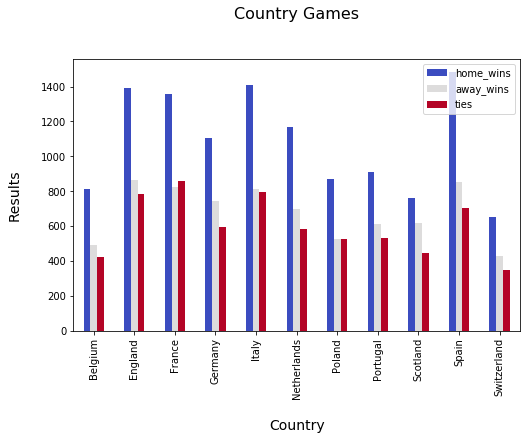

In [64]:
country_count = run_query(q)
country_count.set_index("country", inplace=True, drop=True)

country_count.plot.bar(
    colormap=plt.cm.coolwarm, figsize=(8,5))
plt.ylabel("Results", fontsize = 14, labelpad = 20)
plt.xlabel("Country", fontsize = 14, labelpad = 20)
plt.title("Country Games", fontsize = 16, pad = 40)